##### pip install opencv-python 
##### https://eehoeskrap.tistory.com/289

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이미지 불러오기
ori_image = cv2.imread("./img_Seg.jpg")

In [3]:
# OpenCV => BGR
# matplotlib => RGB 

image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

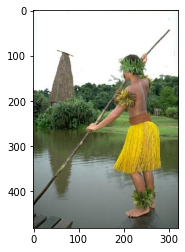

In [4]:
# 이미지를 한 번 구경해보자
plt.imshow(image)

In [5]:
image

array([[[ 48,  45,  30],
        [ 43,  40,  25],
        [ 54,  50,  38],
        ...,
        [ 38,  41,  30],
        [ 22,  25,  14],
        [ 32,  34,  23]],

       [[ 38,  34,  22],
        [ 59,  55,  43],
        [ 55,  51,  39],
        ...,
        [187, 190, 181],
        [152, 155, 144],
        [129, 132, 123]],

       [[ 62,  60,  48],
        [ 36,  34,  22],
        [ 94,  92,  80],
        ...,
        [246, 251, 244],
        [238, 244, 234],
        [253, 255, 249]],

       ...,

       [[ 64,  69,  63],
        [ 65,  70,  64],
        [ 65,  70,  64],
        ...,
        [ 77,  90,  83],
        [ 77,  90,  83],
        [ 75,  88,  81]],

       [[ 68,  73,  66],
        [ 68,  73,  66],
        [ 58,  63,  56],
        ...,
        [ 77,  90,  83],
        [ 77,  90,  83],
        [ 75,  88,  81]],

       [[ 74,  77,  68],
        [ 47,  50,  41],
        [ 40,  43,  34],
        ...,
        [ 75,  88,  81],
        [ 75,  88,  81],
        [ 77,  88,  82]]

In [6]:
# 세로 481, 가로 321, 3개의 channel(R, G, B) 로 이루어진 사진임을 알 수 있다.
image.shape

(481, 321, 3)

데이터는 어떤 형식으로?

In [7]:
# samples : It should be of np.float32 data type, and each feature should be put in a single column.

# cv2.k-means 를 실행하기 위해 형식과 shape 를 바꾸어준다

# 불러온 이미지를 3-dimension 을 가지는 vector 로 만들기 위해 reshape 을 써준다
# 3-dimension 은 각각 R, G, B 를 나타내는 것으로써 픽셀값을 3개의 색깔 (3차원) 로 이루어진 벡터로 만들기 위함이다
vertorized = image.reshape(-1, 3)
vertorized = np.float32(vertorized)

print("vertorized image 의 shape", vertorized.shape)
vertorized

vertorized image 의 shape (154401, 3)


array([[48., 45., 30.],
       [43., 40., 25.],
       [54., 50., 38.],
       ...,
       [75., 88., 81.],
       [75., 88., 81.],
       [77., 88., 82.]], dtype=float32)

#### Criteria 설정

k-means clustering 을 수행시 알고리즘이 멈추게 되는 상황을 정해준다  

멈추게 되는 기준 (criteria) 는 3개의 매개변수로 이루어져 있다.  

1. criterion type : <br>
    cv.TERM_CRITERIA_EPS ☞ Requirement epsilon 을 충족하면 알고리즘 중지  
    cv.TERM_CRITERIA_MAX_ITER ☞ iteration 을 채우면 알고리즘 중지  
    cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER ☞ 위의 조건 중 하나라도 충족되면 알고리즘 중지  
<br>
2. max_iter :
    지정된 반복 횟수 max_iter  
<br>
3. epsilon :
    Requirement accuracy epsilon

In [8]:
# 기준점 설정, 100번 iteration, 0.2 epsilon 둘중 하나를 만족 할 시 알고리즘을 끝낸다
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

#### k-means 설정

k-means clustering 을 실제로 수행한다.  

k-menas 내의 parameter 들은 다음과 같이 이루어져있다.

1. sample : 실제 data
2. nclusters(K) : cluster 갯수
3. criteria : 종료 기준
4. attempts : kmeans 알고리즘의 시도 횟수
6. flags : centriod init method

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv

In [9]:
# cluster k 정하기
k = 4

# k-means clustering 실행
_, labels, centroid = cv2.kmeans(vertorized, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

In [10]:
print(len(labels))
labels.flatten()

154401


array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [11]:
with np.printoptions(threshold=np.inf):
    print(labels.flatten())

[3 3 3 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
# k 가 4개이므로 총 4개의 label 이 생겼음을 알 수 있다
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [13]:
# cluster 들의 색깔(중심)또한 다음과 같이 정해졌다
print(centroid)

[[253.1163   253.66835  252.65869 ]
 [130.59999  134.68716  120.43533 ]
 [206.87569  173.21404   28.07314 ]
 [ 69.95894   80.6717    50.267967]]


In [14]:
print("0번 cluster 의 색깔", centroid[0])
print("1번 cluster 의 색깔", centroid[1])
print("2번 cluster 의 색깔", centroid[2])
print("3번 cluster 의 색깔", centroid[3])

0번 cluster 의 색깔 [253.1163  253.66835 252.65869]
1번 cluster 의 색깔 [130.59999 134.68716 120.43533]
2번 cluster 의 색깔 [206.87569 173.21404  28.07314]
3번 cluster 의 색깔 [69.95894  80.6717   50.267967]


#### 실제 image 그려보기

In [15]:
# 다시 이미지로 되돌리기 위해 type 을 바꿔준다
unit8_centers = np.uint8(centroid)

# flatten the labels array
labels = labels.flatten()

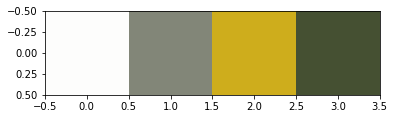

In [16]:
# 0 => 어두운색, 255 => 밝은색
plt.imshow(unit8_centers.reshape(-1,4,3))

In [17]:
# cluster label 에 해당하는 pixel 값을 가져온다.
segmented_image = unit8_centers[labels]
segmented_image

array([[69, 80, 50],
       [69, 80, 50],
       [69, 80, 50],
       ...,
       [69, 80, 50],
       [69, 80, 50],
       [69, 80, 50]], dtype=uint8)

잘 이해가 되지 않을 수 있는데, **a = np.array([1,1,1,2,3,1,0])** 를 입력한 후  
**unit8_centers[a]** 를 출력해보자.

In [18]:
a = np.array([1,1,1,2,3,1,0]) # label 을 임의로 할당한 후 결과값을 확인
unit8_centers[a] 

array([[130, 134, 120],
       [130, 134, 120],
       [130, 134, 120],
       [206, 173,  28],
       [ 69,  80,  50],
       [130, 134, 120],
       [253, 253, 252]], dtype=uint8)

즉, 클러스터링 이후에 구해준 centroid(RGB)값으로 이미지의 색깔을 변경한다 <br>
[253, 253, 252],<br>
[130, 134, 120],<br>
[206, 173,  28],<br>
[ 69,  80,  50]]<br>
이 해당되는 label 에 index 에 맞게 할당되는 것이다

In [19]:
# 이미지를 출력하기 위해 matrix 를 원래의 image 의 shape 로 reshape 시켜준다.
restored_image = segmented_image.reshape(image.shape)
restored_image

array([[[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [130, 134, 120],
        [130, 134, 120],
        [130, 134, 120]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [253, 253, 252],
        [253, 253, 252],
        [253, 253, 252]],

       ...,

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]]

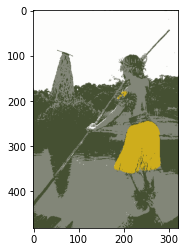

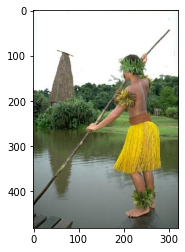

In [20]:
# 이미지를 출력한다
plt.imshow(restored_image)
plt.show()

plt.imshow(image)
plt.show()

You can try many pictures at https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images.html !!!